# IN THIS CODE, WE ARE USING COL DATASET THAT HAS VARIOUS FACTORS x1,x2........ FOR EX: PRICE OF 1KG APPLE, 1BHK RENT, PRICE OF PETROL ETC, AND WILL TAKE USER INPUTS AND THEN USING THESE VALUES(WHICH ARE OF 2022) CALCULATE COST OF LIVING FOR YEAR 2022, THEN USING INFALTION DATASET, BACKTRACK TO 2000 AND THEN PREDICT FUTURE VALUES(EX: 2027)

# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# READING DATASET col_v2(VARIOUS FACTORS AFFECTING COST OF LIVING FOR YEAR 2022) AND DROPPING UNWANTED COLUMNS

In [3]:
df = pd.read_excel('col_v2.xlsx')
df

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,data_quality,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,22067.70,10971.90,2689.62,3.47,1,NaN,NaN,NaN,NaN,NaN
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,17746.11,9416.35,1419.87,5.03,1,NaN,NaN,167.0,NaN,4033.0
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,12892.82,5427.45,1211.68,5.19,1,NaN,NaN,1073.0,NaN,NaN
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,6092.45,2777.51,640.81,7.96,1,NaN,NaN,160.0,NaN,NaN
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,2506.73,1036.74,586.46,8.06,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4952,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4953,Ixtapa Zihuatanejo,Mexico,5.16,30.94,12.89,0.98,NaN,1.80,0.62,0.41,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4954,Iqaluit,Canada,29.65,74.27,13.71,6.67,8.89,3.71,3.52,4.08,...,NaN,NaN,NaN,6.53,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(columns=['Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'data_quality'], inplace=True)

In [5]:
df

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,70.81,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,88.21,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,66.73,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,49.87,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,49.99,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4952,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4953,Ixtapa Zihuatanejo,Mexico,5.16,30.94,12.89,0.98,NaN,1.80,0.62,0.41,...,77.35,103.14,412.55,257.84,515.69,412.55,NaN,NaN,NaN,NaN
4954,Iqaluit,Canada,29.65,74.27,13.71,6.67,8.89,3.71,3.52,4.08,...,NaN,NaN,NaN,NaN,2964.60,2964.60,NaN,NaN,NaN,6.53


# MAKING A SUBSET df_india FOR INDIAN CITIES AND MAKING A COPY df_try1

In [6]:
df_india = df[df['country']=='India']
df_india

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,49.87,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,49.99,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06
16,Kolkata,India,2.00,14.74,3.68,2.21,3.68,1.64,0.36,0.15,...,49.43,34.08,148.65,84.89,388.92,248.24,1038.75,587.51,532.21,8.25
24,Bangalore,India,3.07,18.42,4.30,2.21,3.68,2.09,0.46,0.18,...,46.69,37.25,240.59,145.91,639.32,355.79,1638.59,810.46,969.96,7.97
26,Chennai,India,2.18,12.28,4.91,2.21,4.30,1.63,0.44,0.18,...,46.45,34.67,180.73,107.59,439.84,259.71,1948.95,690.30,552.68,7.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,Nallacheruvu,India,1.84,7.37,3.68,1.29,3.07,1.23,0.39,0.18,...,38.89,15.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.50
4895,Cherukuru,India,4.61,7.37,3.62,0.86,2.21,1.47,0.34,0.10,...,46.06,18.42,45.03,28.66,122.82,102.35,307.04,245.64,245.64,8.75
4907,Elakkurichchi,India,1.23,6.14,3.68,2.46,2.46,2.46,0.25,0.15,...,42.99,30.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.30
4909,Karavadi,India,1.35,11.05,3.56,1.04,2.15,1.56,0.78,0.21,...,42.99,26.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.01


In [7]:
df_india.isnull().sum()

city        0
country     0
x1         11
x2          7
x3          6
x4          8
x5         17
x6         13
x7          5
x8          4
x9          2
x10         3
x11         4
x12         3
x13        13
x14        12
x15        19
x16        18
x17         6
x18        12
x19        17
x20        17
x21         5
x22        26
x23         4
x24        20
x25        20
x26        30
x27        22
x28        29
x29        52
x30        25
x31        17
x32        35
x33        11
x34        37
x35        33
x36        18
x37        26
x38         8
x39        31
x40        58
x41        11
x42        18
x43        27
x44        13
x45        22
x46        22
x47        16
x48        28
x49        30
x50        31
x51        30
x52        58
x53        64
x54        46
x55        14
dtype: int64

In [8]:
df_try1 = df_india.copy()
df_try1

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,49.87,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,49.99,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06
16,Kolkata,India,2.00,14.74,3.68,2.21,3.68,1.64,0.36,0.15,...,49.43,34.08,148.65,84.89,388.92,248.24,1038.75,587.51,532.21,8.25
24,Bangalore,India,3.07,18.42,4.30,2.21,3.68,2.09,0.46,0.18,...,46.69,37.25,240.59,145.91,639.32,355.79,1638.59,810.46,969.96,7.97
26,Chennai,India,2.18,12.28,4.91,2.21,4.30,1.63,0.44,0.18,...,46.45,34.67,180.73,107.59,439.84,259.71,1948.95,690.30,552.68,7.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,Nallacheruvu,India,1.84,7.37,3.68,1.29,3.07,1.23,0.39,0.18,...,38.89,15.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.50
4895,Cherukuru,India,4.61,7.37,3.62,0.86,2.21,1.47,0.34,0.10,...,46.06,18.42,45.03,28.66,122.82,102.35,307.04,245.64,245.64,8.75
4907,Elakkurichchi,India,1.23,6.14,3.68,2.46,2.46,2.46,0.25,0.15,...,42.99,30.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.30
4909,Karavadi,India,1.35,11.05,3.56,1.04,2.15,1.56,0.78,0.21,...,42.99,26.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.01


## FILLING MISSING VALUES USING ffill() METHOD

In [9]:
df_try1 = df_try1.ffill()

In [10]:
df_try1

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,49.87,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,49.99,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06
16,Kolkata,India,2.00,14.74,3.68,2.21,3.68,1.64,0.36,0.15,...,49.43,34.08,148.65,84.89,388.92,248.24,1038.75,587.51,532.21,8.25
24,Bangalore,India,3.07,18.42,4.30,2.21,3.68,2.09,0.46,0.18,...,46.69,37.25,240.59,145.91,639.32,355.79,1638.59,810.46,969.96,7.97
26,Chennai,India,2.18,12.28,4.91,2.21,4.30,1.63,0.44,0.18,...,46.45,34.67,180.73,107.59,439.84,259.71,1948.95,690.30,552.68,7.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,Nallacheruvu,India,1.84,7.37,3.68,1.29,3.07,1.23,0.39,0.18,...,38.89,15.78,67.55,61.41,116.68,92.11,5948.99,462.70,614.09,8.50
4895,Cherukuru,India,4.61,7.37,3.62,0.86,2.21,1.47,0.34,0.10,...,46.06,18.42,45.03,28.66,122.82,102.35,307.04,245.64,245.64,8.75
4907,Elakkurichchi,India,1.23,6.14,3.68,2.46,2.46,2.46,0.25,0.15,...,42.99,30.70,45.03,28.66,122.82,102.35,307.04,245.64,245.64,12.30
4909,Karavadi,India,1.35,11.05,3.56,1.04,2.15,1.56,0.78,0.21,...,42.99,26.41,45.03,28.66,122.82,102.35,307.04,245.64,245.64,9.01


In [11]:
df_try1.isnull().sum()

city       0
country    0
x1         0
x2         0
x3         0
x4         0
x5         0
x6         0
x7         0
x8         0
x9         0
x10        0
x11        0
x12        0
x13        0
x14        0
x15        0
x16        0
x17        0
x18        0
x19        0
x20        0
x21        0
x22        0
x23        0
x24        0
x25        0
x26        0
x27        0
x28        0
x29        0
x30        0
x31        0
x32        0
x33        0
x34        0
x35        0
x36        0
x37        0
x38        0
x39        0
x40        0
x41        0
x42        0
x43        0
x44        0
x45        0
x46        0
x47        0
x48        0
x49        0
x50        0
x51        0
x52        0
x53        0
x54        0
x55        0
dtype: int64

In [12]:
df_try2 = df_try1.copy()
pd.set_option('display.max_columns', None)
df_try2

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,0.75,0.50,0.83,0.95,5.88,3.69,5.95,2.09,0.67,1.34,0.59,0.44,0.44,0.65,0.35,9.83,2.27,3.61,4.30,0.25,4.91,0.31,0.31,1.23,1.35,12281.76,22790.48,43.57,0.01,9.33,25.37,11.39,4.30,107.07,3682.67,32.77,27.75,49.87,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,0.73,0.50,0.85,1.02,4.36,3.81,5.71,1.79,0.75,1.03,0.61,0.37,0.41,0.70,0.36,9.83,1.54,2.49,4.30,0.49,11.67,0.61,0.22,1.23,1.24,12281.76,22940.65,58.07,0.01,7.95,21.20,8.60,4.91,74.00,1964.24,32.12,33.44,49.99,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06
16,Kolkata,India,2.00,14.74,3.68,2.21,3.68,1.64,0.36,0.15,0.63,0.37,0.69,0.92,5.04,3.05,6.38,1.88,0.65,1.19,0.64,0.40,0.44,0.37,0.34,9.52,1.77,2.96,4.05,0.20,3.93,0.61,0.31,1.23,1.33,12281.76,22528.10,31.81,0.01,7.47,18.61,8.00,3.56,49.59,1624.54,28.94,26.31,49.43,34.08,148.65,84.89,388.92,248.24,1038.75,587.51,532.21,8.25
24,Bangalore,India,3.07,18.42,4.30,2.21,3.68,2.09,0.46,0.18,0.58,0.57,0.76,0.98,6.54,3.83,6.61,2.38,0.72,1.16,0.46,0.44,0.44,0.57,0.36,11.05,1.91,3.50,4.30,0.61,18.42,1.23,0.37,1.23,1.29,14738.11,24236.01,24.93,0.01,10.75,20.33,5.13,4.91,111.85,2681.52,30.92,32.34,46.69,37.25,240.59,145.91,639.32,355.79,1638.59,810.46,969.96,7.97
26,Chennai,India,2.18,12.28,4.91,2.21,4.30,1.63,0.44,0.18,0.61,0.50,0.68,0.85,6.15,3.19,5.80,2.50,0.78,1.35,0.51,0.50,0.45,0.63,0.37,5.53,1.81,3.12,4.42,0.31,12.28,1.23,0.25,1.23,1.32,12281.76,24164.54,33.92,0.01,9.48,17.77,6.30,2.46,71.79,1281.91,29.10,28.48,46.45,34.67,180.73,107.59,439.84,259.71,1948.95,690.30,552.68,7.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,Nallacheruvu,India,1.84,7.37,3.68,1.29,3.07,1.23,0.39,0.18,0.34,0.44,0.47,0.74,13.26,3.22,7.16,2.03,0.83,1.42,0.54,0.49,0.62,0.41,0.37,3.68,1.64,3.68,4.91,0.11,18.42,1.11,0.15,0.61,1.15,15352.20,28248.05,33.93,0.01,9.82,12.28,6.14,2.46,40.26,757.38,20.47,21.29,38.89,15.78,67.55,61.41,116.68,92.11,5948.99,462.70,614.09,8.50
4895,Cherukuru,India,4.61,7.37,3.62,0.86,2.21,1.47,0.34,0.10,0.69,0.45,0.74,0.93,3.56,1.72,7.16,1.11,0.61,0.70,0.55,0.25,0.43,0.34,0.37,5.53,1.66,2.64,3.38,0.25,6.75,0.61,0.13,0.86,1.19,18422.64,28248.05,30.70,0.01,7.37,15.35,3.07,3.07,34.80,798.31,15.35,42.99,46.06,18.42,45.03,28.66,122.82,102.35,307.04,245.64,245.64,8.75
4907,Elakkurichchi,India,1.23,6.14,3.68,2.46,2.46,2.46,0.25,0.15,0.55,0.25,0.58,0.70,5.53,3.07,8.60,1.23,0.49,0.49,0.61,0.25,0.12,0.31,0.31,6.14,1.84,2.15,1.47,0.25,6.75,1.84,0.17,0.61,0.91,11053.58,14738.11,46.06,0.01,8.60,15.35,3.07,1.47,23.54,921.13,12.28,9.21,42.99,30.70,45.03,28.66,122.82,102.35,307.04,245.64,245.64,12.30
4909,Karavadi,India,1.35,11.05,3.56,1.04,2.15,1.56,0.78,0.21,0.71,0.50,0.71,0.99,6.22,3.60,3.99,1.97,0.80,1.51,0.58,0.55,0.54,0.86,0.43,5.53,0.84,2.46,4.91,0.25,6.75,1.23,0.25,1.54,1.22,11053.58,22107.17,27.63,0.01,18.01,15.35,3.07,3.99,12.28,7369.06,20.88,23.34,42.99,26.41,45.03,28.66,122.82,102.35,307.04,245.64,245.64,9.01


# TAKING USER INPUTS BY ASKING VARIOUS QUESTIONS AND STORING THEM INTO VARIOUS VARIABLES(BASIC PYTHON CODE) AND CALCULATING USING VARIOUS COLUMNS 

## TAKING INPUT

In [13]:
# # city = input("Enter city:")

# no_of_adult = int(input("Enter number of adults(excluding university students) you want to predict for: "))
# preschoolers = int(input("No of children in preschool:"))
# schoolers = int(input("No of children in primary-secondary:"))
# universitites = int(input("No of children in university:"))
# no_of_infant = int(input("Enter number of children below 2 years you want to predict for: "))

# res_level = input("Do you prefer inexpensive restaurants or mid-range: ").lower()
# eat_out = int(input("How often do you eat out in a month: "))

# alcohol = input("What do you prefer, local beer or imported beer or wine or none alcohol? ").lower()

# cafe = int(input("How often do you go out to cafes? "))

# food_pref = input("veg or non-veg?")
# cuisine =  input("What type of cuisine? Indian, American, Arabic, etc.")

# smoke = input("Do you smoke?")

# no_of_cars = int(input("How many cars do yo own:"))
# no_of_bikes = int(input("How many bikes do you own:"))
# travel_distance_car = int(input("How much does your family travel each week on average in car:"))
# travel_distance_bike = int(input("How much does your family travel each week on average on bike:"))
# taxi = int(input("How often using taxi per month:"))

# buy_car = input("Would you like to buy a car:")
# buy_car_years = int(input("In how many years?"))

# bhk = int(input("Would you a prefer a 1bhk, 2bhk or 3bhk house?"))
# location = input("Would you prefer a house in city center or outskirts?")

# gym = int(input("How many members in your family go to gym?"))
# movie = int(input("How often watching movies in cinema?"))

# save_house = input("Would you like to save amount for buying a house in future?")
# save_house_years = int(input("How many years before you buy?"))

In [14]:
# TOTAL MEMBERS
no_of_adult = int(input("Enter number of adults(excluding university students) you want to predict for: "))
preschoolers = int(input("No of children in preschool:"))
schoolers = int(input("No of children in primary-secondary:"))
universitites = int(input("No of children in university:"))
no_of_infant = int(input("Enter number of children below 2 years you want to predict for: "))
total_members = no_of_adult + universitites + 0.75*schoolers + 0.5*preschoolers

Enter number of adults(excluding university students) you want to predict for:  1
No of children in preschool: 0
No of children in primary-secondary: 0
No of children in university: 0
Enter number of children below 2 years you want to predict for:  0


In [15]:
# EATING OUT
res_level = input("Do you prefer inexpensive restaurants or mid-range: ").lower()
eat_out = int(input("How often do you eat out in a month: "))
if res_level == 'inexpensive':
    res_cost = df_try1['x1'] + df_try1['x3']
elif res_level == 'mid-range':
    res_cost = (df_try1['x2'])/2 + df_try1['x3']
else:
    res_level = 'invalid'

eat_out_cost = (eat_out/2)*res_cost
total_eat_out_cost = eat_out_cost * total_members

Do you prefer inexpensive restaurants or mid-range:  mid-range
How often do you eat out in a month:  1


In [17]:
# ALCOHOL
alcohol_consumption = 0
alcohol = input("What do you prefer, local beer or imported beer or wine or none alcohol? ").lower()
alcohol_consumers = int(input("How many in your family consume alcohol? "))
if alcohol != 'none':
    alcohol_consumption = int(input("How often do you drink in a month: "))
    if alcohol == 'local beer':
        alcohol_cost = eat_out * df_try1['x4'] + alcohol_consumption * df_try1['x25']
    elif alcohol == 'imported beer':
        alcohol_cost = eat_out * df_try1['x5'] + alcohol_consumption * df_try1['x26']
    elif alcohol == 'wine':
        alcohol_cost = (eat_out+alcohol_consumption) * df_try1['x24']
elif alcohol == 'none':
    alcohol_cost = 0
total_alcohol_cost = alcohol_cost * alcohol_consumers

What do you prefer, local beer or imported beer or wine or none alcohol?  none
How many in your family consume alcohol?  0


In [18]:
# CAFE 
cafe = int(input("How often do you go out to cafes? "))
coffee_cost = total_members * cafe * df_try1['x6']

How often do you go out to cafes?  2


In [19]:
# SMOKING
smoke = input("Do you smoke?")
if smoke=='yes':
    smoke_freq = input("How often you smoke:")
    if smoke_freq == "Once daily":
        if total_members > 1:
            smokers = int(input("How many people smoke in your family?"))
            smoke_cost = smokers * (df_try1['x27']*1.5) 
        else :
            smoke_cost = df_try1['x27']*1.5
    elif smoke_freq == "Once a week":
        if total_members > 1:
            smokers = int(input("How many people smoke in your family?"))
            smoke_cost = smokers * (df_try1['x27']/5) 
        else :
            smoke_cost = df_try1['x27']/5
    elif smoke_freq == "2-3 times a week":
        if total_members > 1:
            smokers = int(input("How many people smoke in your family?"))
            smoke_cost = smokers * (df_try1['x27']/2) 
        else :
            smoke_cost = df_try1['x27']/2
    elif smoke_freq == "Once a month":
        if total_members > 1:
            smokers = int(input("How many people smoke in your family?"))
            smoke_cost = smokers * (df_try1['x27']/20) 
        else :
            smoke_cost = df_try1['x27']/20
    elif smoke_freq == "More than once a day":
        if total_members > 1:
            smokers = int(input("How many people smoke in your family?"))
            smoke_cost = smokers * (df_try1['x27']*3) 
        else :
             smoke_cost = df_try1['x27']*3
elif smoke=='no':
    smoke_cost = 0

Do you smoke? no


In [20]:
# TRANSPORT
no_of_cars = int(input("How many cars do yo own:"))
no_of_bikes = int(input("How many bikes do you own:"))
travel_distance_car = int(input("How much does your family travel each week on average in car:"))
travel_distance_bike = int(input("How much does your family travel each week on average on bike:"))

total_petrol_car = travel_distance_car/12.5
total_petrol_bike = travel_distance_bike/40
total_petrol = total_petrol_car+total_petrol_bike
petrol_cost = total_petrol * df_try1['x33']

taxi = int(input("How often using taxi per month:"))
taxi_cost = taxi * df_try1['x31'] * 5
travel_cost = petrol_cost + taxi_cost

How many cars do yo own: 1
How many bikes do you own: 1
How much does your family travel each week on average in car: 10
How much does your family travel each week on average on bike: 100
How often using taxi per month: 1


In [21]:
# GYM + MOVIE
gym = int(input("How many members in your family go to gym?"))
movie = int(input("How often watching movies in cinema?"))

gym_cost = gym * df_try1['x39']
movie_cost = movie * df_try1['x41'] * total_members

leisure_cost = gym_cost + movie_cost 

How many members in your family go to gym? 1
How often watching movies in cinema? 1


In [22]:
# EDUCATION FOR KIDS
preschool_cost = preschoolers * df_try1['x42']
school_cost = schoolers * (df_try1['x43']/12)
university_cost = universitites * (df_try1['x43']*1.5/12)
education_cost = preschool_cost + school_cost + university_cost

In [23]:
#BUYING CAR
buy_car = input("Would you like to buy a car (yes/no): ")
buy_car_years = int(input("In how many years? "))

if buy_car.lower() == 'yes':
    car_type = input("What type of car? (Sedan, Hatchback, SUV): ").lower()
    if car_type == 'hatchback':
        total_car_price = df_try1['x34']
    elif car_type == 'sedan':
        total_car_price = df_try1['x35']
    elif car_type == 'suv':
        price_diff_ratio = (df_try1['x35'] - df_try1['x34']) / df_try1['x34']
        total_car_price = df_try1['x35'] + (price_diff_ratio * df_try1['x35'])
    else:
        print("Invalid car type entered.")
        total_car_price = 0
    save_car_amount = total_car_price / (buy_car_years * 12)
else:
    save_car_amount = 0


Would you like to buy a car (yes/no):  yes
In how many years?  5
What type of car? (Sedan, Hatchback, SUV):  Sedan


In [24]:
# RENT
bhk = int(input("Would you a prefer a 1bhk, 2bhk or 3bhk house?"))
location = input("Would you prefer a house in city center or outskirts?")
if location == 'center':
    if bhk==1:
        rent = df_try1['x48']
    elif bhk==3:
        rent = df_try1['x50']
    elif bhk==2:
        rent = (df_try1['x48']+df_try1['x50'])/2
elif location =='outskirts':
    if bhk==1:
        rent = df_try1['x49']
    elif bhk==3:
        rent = df_try1['x51']
    elif bhk==2:
        rent = (df_try1['x49']+df_try1['x51'])/2

Would you a prefer a 1bhk, 2bhk or 3bhk house? 2
Would you prefer a house in city center or outskirts? center


In [25]:
# BASIC HOUSE AMENITIES
if bhk==1:
    amenities_cost = df_try1['x36']/3
elif bhk==2:
    amenities_cost = (df_try1['x36']/3)*2
elif bhk==3:
    amenities_cost = df_try1['x36']

In [26]:
# BUYING HOUSE
save_house = input("Would you like to save amount for buying a house in future?")
save_house_years = int(input("How many years before you buy?"))

if save_house == 'yes':
    if bhk == 1:
        if location == 'center':
            total_price = df_try1['x52'] * 30
            save_house_amount = total_price / (save_house_years * 12)
        elif location =='outskirts':
            total_price = df_try1['x53'] * 30
            save_house_amount = total_price / (save_house_years * 12)
    elif bhk == 2:
        if location == 'center':
            total_price = df_try1['x52'] * 60
            save_house_amount = total_price / (save_house_years * 12)
        elif location =='outskirts':
            total_price = df_try1['x53'] * 60
            save_house_amount = total_price / (save_house_years * 12)
    elif bhk == 3:
        if location == 'center':
            total_price = df_try1['x52'] * 90
            save_house_amount = total_price / (save_house_years * 12)
        elif location =='outskirts':
            total_price = df_try1['x53'] * 90
            save_house_amount = total_price / (save_house_years * 12)
else:
   save_house_amount=0

Would you like to save amount for buying a house in future? yes
How many years before you buy? 10


In [27]:
# INTERNET COST 
internet_cost = df_try1['x38'] + total_members * df_try1['x38']

In [28]:
# CALLING COST
call_cost = df_try1['x37'] * 200 * (no_of_adult + universitites)

In [29]:
# CUISINE
food_pref = input("veg or non-veg?")
cuisine =  input("What type of cuisine? Indian, American, Arabic, etc.")

if cuisine == 'Indian':
    if food_pref == 'veg':
        rice_cost = df_try1['x11'] * 6
        bread_cost = df_try1['x10'] * 15
        cheese_cost = df_try1['x13']
        fruit_vegetable_cost = df_try1['x16'] * 4 + df_try1['x17'] * 4 + df_try1['x18'] * 4 + df_try1['x19'] * 5 + df_try1['x20'] * 5 + df_try1['x21'] * 3 + df_try1['x22']
        milk_cost = df_try1['x9'] * 10
        softdrink_cost = df_try1['x7'] * 3
        total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost 
    elif food_pref == 'non-veg':
        rice_cost = df_try1['x11'] * 6
        bread_cost = df_try1['x10'] * 15
        cheese_cost = df_try1['x13']
        fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
        milk_cost = df_try1['x9'] * 10
        softdrink_cost = df_try1['x7'] * 3
        egg_cost = df_try1['x12'] * 3
        meat_cost = df_try1['x14'] * 6 + df_try1['x15'] * 6  
        total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
        
elif cuisine == 'Arabic':
    rice_cost = df_try1['x11'] * 7
    bread_cost = df_try1['x10'] * 15
    cheese_cost = df_try1['x13']
    fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
    milk_cost = df_try1['x9'] * 10
    softdrink_cost = df_try1['x7'] * 3
    egg_cost = df_try1['x12'] * 5
    meat_cost = df_try1['x14'] * 7 + df_try1['x15'] * 7
    total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
    
elif cuisine == 'American':
    rice_cost = df_try1['x11'] * 3
    bread_cost = df_try1['x10'] * 15
    cheese_cost = df_try1['x13'] * 1.5
    fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
    milk_cost = df_try1['x9'] * 10
    softdrink_cost = df_try1['x7'] * 6
    egg_cost = df_try1['x12'] * 5
    meat_cost = df_try1['x14'] * 8 + df_try1['x15'] * 8
    total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost

elif cuisine == 'English':
    rice_cost = df_try1['x11'] * 5
    bread_cost = df_try1['x10'] * 15
    cheese_cost = df_try1['x13'] * 1
    fruit_vegetable_cost = df_try1['x16'] * 4 + df_try1['x17'] * 4 + df_try1['x18'] * 4 + df_try1['x19'] * 5 + df_try1['x20'] * 5 + df_try1['x21'] * 3 + df_try1['x22']
    milk_cost = df_try1['x9'] * 10
    softdrink_cost = df_try1['x7'] * 6
    egg_cost = df_try1['x12'] * 5
    meat_cost = df_try1['x14'] * 8 + df_try1['x15'] * 8
    total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost

elif cuisine == 'Italian':
    bread_cost = df_try1['x10'] * 20
    cheese_cost = df_try1['x13'] * 1.5
    fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
    milk_cost = df_try1['x9'] * 8
    softdrink_cost = df_try1['x7'] * 4
    egg_cost = df_try1['x12'] * 2
    meat_cost = df_try1['x14'] * 6 + df_try1['x15'] * 6    
    total_food_cost = bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
   
elif cuisine == 'Japanese':
    rice_cost = df_try1['x11'] * 5
    cheese_cost = df_try1['x13'] * 1
    fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
    milk_cost = df_try1['x9'] * 8
    softdrink_cost = df_try1['x7'] * 4
    egg_cost = df_try1['x12'] * 2
    meat_cost = df_try1['x14'] * 7 + df_try1['x15'] * 7
    total_food_cost = rice_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost

elif cuisine == 'Mexican':
    bread_cost = df_try1['x10'] * 20
    cheese_cost = df_try1['x13'] * 1
    fruit_vegetable_cost = df_try1['x16'] * 4 + df_try1['x17'] * 4 + df_try1['x18'] * 4 + df_try1['x19'] * 5 + df_try1['x20'] * 5 + df_try1['x21'] * 3 + df_try1['x22']
    milk_cost = df_try1['x9'] * 8
    softdrink_cost = df_try1['x7'] * 4
    egg_cost = df_try1['x12'] * 3
    meat_cost = df_try1['x14'] * 6 + df_try1['x15'] * 6
    total_food_cost = bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
   
elif cuisine == 'French':
    bread_cost = df_try1['x10'] * 20
    cheese_cost = df_try1['x13'] * 1.5
    fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
    milk_cost = df_try1['x9'] * 8
    softdrink_cost = df_try1['x7'] * 4
    egg_cost = df_try1['x12'] * 3
    meat_cost = df_try1['x14'] * 7 + df_try1['x15'] * 7
    total_food_cost = bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
    
elif cuisine == 'Thai':
    rice_cost = df_try1['x11'] * 6
    cheese_cost = df_try1['x13'] * 1
    fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
    milk_cost = df_try1['x9'] * 8
    softdrink_cost = df_try1['x7'] * 4
    egg_cost = df_try1['x12'] * 2
    meat_cost = df_try1['x14'] * 6 + df_try1['x15'] * 6  
    total_food_cost = rice_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
   
elif cuisine == 'Chinese':
    rice_cost = df_try1['x11'] * 7
    bread_cost = df_try1['x10'] * 10
    cheese_cost = df_try1['x13'] * 1
    fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
    milk_cost = df_try1['x9'] * 10
    softdrink_cost = df_try1['x7'] * 6
    egg_cost = df_try1['x12'] * 2
    meat_cost = df_try1['x14'] * 7 + df_try1['x15'] * 7
    total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost

final_total_food_cost = total_food_cost * total_members

        

veg or non-veg? veg
What type of cuisine? Indian, American, Arabic, etc. Indian


In [30]:
total_col = total_eat_out_cost + total_alcohol_cost + coffee_cost + smoke_cost + travel_cost + leisure_cost + education_cost + save_car_amount + rent + amenities_cost + save_house_amount + call_cost + final_total_food_cost




## MAKING A NEW COLUMNS 'COL_2022' THAT HAS THE total_col VALUE FOR YEAR 2022 FOR ALL CITIES

In [31]:
city = input("Enter city:")

Enter city: Mumbai


In [32]:
city_rows = df_try1['city'] == city
        
df_try1.loc[city_rows, 'COL_2022'] = total_col
df_try3 = df_try1[df_try1['city']==city]

In [33]:
df_try3

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,COL_2022
3,Mumbai,India,3.68,18.42,3.68,2.46,4.3,2.48,0.48,0.19,0.75,0.5,0.83,0.95,5.88,3.69,5.95,2.09,0.67,1.34,0.59,0.44,0.44,0.65,0.35,9.83,2.27,3.61,4.3,0.25,4.91,0.31,0.31,1.23,1.35,12281.76,22790.48,43.57,0.01,9.33,25.37,11.39,4.3,107.07,3682.67,32.77,27.75,49.87,41.17,522.4,294.05,1411.12,699.8,6092.45,2777.51,640.81,7.96,4521.773


In [ ]:
# # TOTAL MEMBERS
# total_members = no_of_adult + universitites + 0.75*schoolers + 0.5*preschoolers

# # EATING OUT
# if res_level == 'inexpensive':
#     res_cost = df_try1['x1'] + df_try1['x3']
# elif res_level == 'mid-range':
#     res_cost = (df_try1['x2'])/2 + df_try1['x3']
# else:
#     res_level = 'invalid'

# eat_out_cost = (eat_out/2)*res_cost

# # ALCOHOL
# if alcohol != 'none':
#     alcohol_consumption = int(input("How often do you drink in a month: "))
#     if alcohol == 'local beer':
#         alcohol_cost = eat_out * df_try1['x4'] + alcohol_consumption * df_try1['x25']
#     elif alcohol == 'imported beer':
#         alcohol_cost = eat_out * df_try1['x5'] + alcohol_comsumption * df_try1['x26']
#     elif alcohol == 'wine':
#         alcohol_cost = (eat_out+alcohol_consumption) * df_try1['x24']
# elif alcohol == 'none':
#     alcohol_cost = 0

# # CAFE 
# coffee_cost = cafe * df_try1['x6']

# # SMOKING
# if smoke=='yes':
#     smoke_freq = input("How often you smoke:")
#     if smoke_freq == "Once daily":
#         if total_members != 1:
#             smokers = int(input("How many people smoke in your family?"))
#             smoke_cost = smokers * (df_try1['x27']*1.5) 
#         else :
#             smoke_cost = df_try1['x27']*1.5
#     elif smoke_freq == "Once a week":
#         if total_members != 1:
#             smokers = int(input("How many people smoke in your family?"))
#             smoke_cost = smokers * (df_try1['x27']/5) 
#         else :
#             smoke_cost = df_try1['x27']/5
#     elif smoke_freq == "2-3 times a week":
#         if total_members != 1:
#             smokers = int(input("How many people smoke in your family?"))
#             smoke_cost = smokers * (df_try1['x27']/2) 
#         else :
#             smoke_cost = df_try1['x27']/2
#     elif smoke_freq == "Once a month":
#         if total_members != 1:
#             smokers = int(input("How many people smoke in your family?"))
#             smoke_cost = smokers * (df_try1['x27']/20) 
#         else :
#             smoke_cost = df_try1['x27']/20
#     elif smoke_freq == "More than once a day":
#         if total_members != 1:
#             smokers = int(input("How many people smoke in your family?"))
#             smoke_cost = smokers * (df_try1['x27']*3) 
#         else :
#              smoke_cost = df_try1['x27']*3
# elif smoke=='no':
#     smoke_cost = 0

# # TRANSPORT
# total_petrol_car = travel_distance_car/12.5
# total_petrol_bike = travel_distance_bike/40
# total_petrol = total_petrol_car+total_petrol_bike
# petrol_cost = total_petrol * df_try1['x33']

# taxi_cost = taxi * df_try1['x31'] * 5
# travel_cost = petrol_cost + taxi_cost

# # GYM + MOVIE
# gym_cost = gym * df_try1['x39']
# movie_cost = movie * df_try1['x41']
# leisure_cost = gym_cost + total_members * movie_cost 

# # EDUCATION FOR KIDS
# preschool_cost = preschoolers * df_try1['x42']
# school_cost = schoolers * (df_try1['x43']/12)
# university_cost = universitites * (df_try1['x43']*1.5/12)
# education_cost = preschoolers + schoolers + universitites

# # BUYING HOUSE
# if save_house == 'yes':
#     if bhk == 1:
#         if location == 'center':
#             total_price = df_try1['x52'] * 30
#             save_house_amount = total_price / (save_house_years * 12)
#         elif location =='outskirts':
#             total_price = df_try1['x53'] * 30
#             save_house_amount = total_price / (save_house_years * 12)
#     elif bhk == 2:
#         if location == 'center':
#             total_price = df_try1['x52'] * 60
#             save_house_amount = total_price / (save_house_years * 12)
#         elif location =='outskirts':
#             total_price = df_try1['x53'] * 60
#             save_house_amount = total_price / (save_house_years * 12)
#     elif bhk == 3:
#         if location == 'center':
#             total_price = df_try1['x52'] * 90
#             save_house_amount = total_price / (save_house_years * 12)
#         elif location =='outskirts':
#             total_price = df_try1['x53'] * 90
#             save_house_amount = total_price / (save_house_years * 12)
# else:
#    save_house_amount=0

# # BUYING CAR
# if buy_car == 'yes':
#     car_type = input("What type of car?Sedan, Hatchback, SUV")
#     if car_type == 'Hatchback':
#         total_car_price = df_try1['x34']
#         save_car_amount = total_car_price/ (buy_car_years * 12)
#     elif car_type == 'Sedan':
#         total_car_price = df_try1['x35']
#         save_car_amount = total_car_price/ (buy_car_years * 12)
#     elif car_type == 'SUV':
#         price_diff_ratio = (df_try1['x35'] - df_try1['x34'])/df_try1['x34']
#         total_car_price = df_try1['x35'] + (price_diff_ratio * df_try1['x35'])
#         save_car_amount = total_car_price/ (buy_car_years * 12)
# else:
#     save_car_amount = 0

# # RENT
# if location == 'center':
#     if bhk==1:
#         rent = df_try1['x48']
#     elif bhk==3:
#         rent = df_try1['x50']
#     elif bhk==2:
#         rent = (df_try1['x48']+df_try1['x50'])/2
# elif location =='outskirts':
#     if bhk==1:
#         rent = df_try1['x49']
#     elif bhk==3:
#         rent = df_try1['x51']
#     elif bhk==2:
#         rent = (df_try1['x49']+df_try1['x51'])/2

# # BASIC HOUSE AMENITIES
# if bhk==1:
#     amenities_cost = df_try1['x36']/3
# elif bhk==2:
#     amenities_cost = (df_try1['x36']/3)*2
# elif bhk==3:
#     amenities_cost = df_try1['x36']

# # INTERNET COST 
# internet_cost = df_try1['x38'] + total_members * df_try1['x38']

# # CALLING COST
# call_cost = df_try1['x37'] * 200 * (no_of_adult + universitites)

# # CUISINE
# if cuisine == 'Indian':
#     if food_pref == 'veg':
#         rice_cost = df_try1['x11'] * 6
#         bread_cost = df_try1['x10'] * 15
#         cheese_cost = df_try1['x13']
#         fruit_vegetable_cost = df_try1['x16'] * 4 + df_try1['x17'] * 4 + df_try1['x18'] * 4 + df_try1['x19'] * 5 + df_try1['x20'] * 5 + df_try1['x21'] * 3 + df_try1['x22']
#         milk_cost = df_try1['x9'] * 10
#         softdrink_cost = df_try1['x7'] * 3
#         total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost 
#     elif food_pref == 'non-veg':
#         rice_cost = df_try1['x11'] * 6
#         bread_cost = df_try1['x10'] * 15
#         cheese_cost = df_try1['x13']
#         fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
#         milk_cost = df_try1['x9'] * 10
#         softdrink_cost = df_try1['x7'] * 3
#         egg_cost = df_try1['x12'] * 3
#         meat_cost = df_try1['x14'] * 6 + df_try1['x15'] * 6  
#         total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
        
# elif cuisine == 'Arabic':
#     rice_cost = df_try1['x11'] * 7
#     bread_cost = df_try1['x10'] * 15
#     cheese_cost = df_try1['x13']
#     fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
#     milk_cost = df_try1['x9'] * 10
#     softdrink_cost = df_try1['x7'] * 3
#     egg_cost = df_try1['x12'] * 5
#     meat_cost = df_try1['x14'] * 7 + df_try1['x15'] * 7
#     total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
    
# elif cuisine == 'American':
#     rice_cost = df_try1['x11'] * 3
#     bread_cost = df_try1['x10'] * 15
#     cheese_cost = df_try1['x13'] * 1.5
#     fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
#     milk_cost = df_try1['x9'] * 10
#     softdrink_cost = df_try1['x7'] * 6
#     egg_cost = df_try1['x12'] * 5
#     meat_cost = df_try1['x14'] * 8 + df_try1['x15'] * 8
#     total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost

# elif cuisine == 'English':
#     rice_cost = df_try1['x11'] * 5
#     bread_cost = df_try1['x10'] * 15
#     cheese_cost = df_try1['x13'] * 1
#     fruit_vegetable_cost = df_try1['x16'] * 4 + df_try1['x17'] * 4 + df_try1['x18'] * 4 + df_try1['x19'] * 5 + df_try1['x20'] * 5 + df_try1['x21'] * 3 + df_try1['x22']
#     milk_cost = df_try1['x9'] * 10
#     softdrink_cost = df_try1['x7'] * 6
#     egg_cost = df_try1['x12'] * 5
#     meat_cost = df_try1['x14'] * 8 + df_try1['x15'] * 8
#     total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
        
# elif cuisine == 'Italian':
#     bread_cost = df_try1['x10'] * 20
#     cheese_cost = df_try1['x13'] * 1.5
#     fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
#     milk_cost = df_try1['x9'] * 8
#     softdrink_cost = df_try1['x7'] * 4
#     egg_cost = df_try1['x12'] * 2
#     meat_cost = df_try1['x14'] * 6 + df_try1['x15'] * 6    
#     total_food_cost = bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
   
# elif cuisine == 'Japanese':
#     rice_cost = df_try1['x11'] * 5
#     cheese_cost = df_try1['x13'] * 1
#     fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
#     milk_cost = df_try1['x9'] * 8
#     softdrink_cost = df_try1['x7'] * 4
#     egg_cost = df_try1['x12'] * 2
#     meat_cost = df_try1['x14'] * 7 + df_try1['x15'] * 7
#     total_food_cost = rice_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost

# elif cuisine == 'Mexican':
#     bread_cost = df_try1['x10'] * 20
#     cheese_cost = df_try1['x13'] * 1
#     fruit_vegetable_cost = df_try1['x16'] * 4 + df_try1['x17'] * 4 + df_try1['x18'] * 4 + df_try1['x19'] * 5 + df_try1['x20'] * 5 + df_try1['x21'] * 3 + df_try1['x22']
#     milk_cost = df_try1['x9'] * 8
#     softdrink_cost = df_try1['x7'] * 4
#     egg_cost = df_try1['x12'] * 3
#     meat_cost = df_try1['x14'] * 6 + df_try1['x15'] * 6
#     total_food_cost = bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
   
# elif cuisine == 'French':
#     bread_cost = df_try1['x10'] * 20
#     cheese_cost = df_try1['x13'] * 1.5
#     fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
#     milk_cost = df_try1['x9'] * 8
#     softdrink_cost = df_try1['x7'] * 4
#     egg_cost = df_try1['x12'] * 3
#     meat_cost = df_try1['x14'] * 7 + df_try1['x15'] * 7
#     total_food_cost = bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
    
# elif cuisine == 'Thai':
#     rice_cost = df_try1['x11'] * 6
#     cheese_cost = df_try1['x13'] * 1
#     fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
#     milk_cost = df_try1['x9'] * 8
#     softdrink_cost = df_try1['x7'] * 4
#     egg_cost = df_try1['x12'] * 2
#     meat_cost = df_try1['x14'] * 6 + df_try1['x15'] * 6  
#     total_food_cost = rice_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
   
# elif cuisine == 'Chinese':
#     rice_cost = df_try1['x11'] * 7
#     bread_cost = df_try1['x10'] * 10
#     cheese_cost = df_try1['x13'] * 1
#     fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
#     milk_cost = df_try1['x9'] * 10
#     softdrink_cost = df_try1['x7'] * 6
#     egg_cost = df_try1['x12'] * 2
#     meat_cost = df_try1['x14'] * 7 + df_try1['x15'] * 7
#     total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost


# total_col = total_members * (eat_out_cost) + no_of_adult * (alcohol_cost) + total_members * (coffee_cost) + smoke_cost + travel_cost + leisure_cost + education_cost + save_house_amount + rent + amenities_cost + save_car_amount + internet_cost + call_cost + total_members * (total_food_cost)


# # for i in df_try2['country']:
# #     print(eat_out_cost)
# #     print(alcohol_cost)
# #     print(coffee_cost)
# #     print(smoke_cost)
# #     print(travel_cost)
# #     print(leisure_cost)
# #     print(education_cost)
# #     print(save_house_amount)
# #     print(rent)
# #     print(amenities_cost)
# #     print(save_car_amount)
# #     print(internet_cost)
# #     print(call_cost)
# #     print(total_food_cost)

## EXTRACTING ONLY CITY, COUNTRY AND COL_2022 FROM THE DATASET

In [34]:
selected_columns = ['city', 'country', 'COL_2022']

df_try3backtrack = df_try3[selected_columns]
df_try3backtrack

,city,country,COL_2022
3,Mumbai,India,4521.773


In [35]:
selected_columns = ['city', 'country', 'COL_2022']

df_try1backtrack = df_try1[selected_columns]
df_try1backtrack

,city,country,COL_2022
3,Mumbai,India,4521.773
4,Delhi,India,NaN
16,Kolkata,India,NaN
24,Bangalore,India,NaN
26,Chennai,India,NaN
...,...,...,...
4868,Nallacheruvu,India,NaN
4895,Cherukuru,India,NaN
4907,Elakkurichchi,India,NaN
4909,Karavadi,India,NaN


# READING THE INFLATION DATASET OF INDIA WHICH HAS INDIA'S INFLATION RATES FROM 1970-2022

In [36]:
# import pandas as pd

# Read the Excel file into a DataFrame
df_inflation_india = pd.read_excel('inflation_india.xlsx')

# # Now df_inflation_india DataFrame does not contain 'Column1'


In [44]:
df_inflation_india

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,India,5.1,3.08,6.44,16.94,28.6,5.75,-7.63,8.31,2.52,6.28,11.35,13.11,7.89,11.87,8.32,5.56,8.73,8.8,9.38,7.07,8.97,13.87,11.79,6.33,10.25,10.22,8.98,7.16,13.23,4.67,4.01,3.78,4.3,3.81,3.77,4.25,5.8,6.37,8.35,10.88,11.99,8.86,9.31,10.91,6.35,5.87,4.94,3.6,4.86,4.76,6.62,4.89,6.69


# BACKTRACKING AND PREDICTING

## BACKTRACKING FROM 2022 TO 2000 USING THE COL_2022 VALUE THAT WE CALCULATED AND THE INFLATION DATASET, AND MAKING A NEW DATAFRAME merged_df_7 THAT HAS COL VALUES FROM 2000-2022 FOR ALL CITIES

In [38]:
# # Replace 'merged_df_6' with 'merged_df_7' in the code
# merged_df_7 = pd.merge(df_try1backtrack, df_inflation_india[['country', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000']], on='country', how='left')

# # Rename the inflation rate column for clarity
# merged_df_7.rename(columns={'2022': 'inflation_2022', '2021':'inflation_2021','2020':'inflation_2020', '2019':'inflation_2019', '2018':'inflation_2018', '2017':'inflation_2017', '2016':'inflation_2016', '2015':'inflation_2015', '2014':'inflation_2014', '2013':'inflation_2013', '2012':'inflation_2012', '2011':'inflation_2011', '2010':'inflation_2010', '2009':'inflation_2009', '2008':'inflation_2008', '2007':'inflation_2007', '2006':'inflation_2006', '2005':'inflation_2005', '2004':'inflation_2004', '2003':'inflation_2003', '2002':'inflation_2002', '2001':'inflation_2001', '2000':'inflation_2000', '1999':'inflation_1999'}, inplace=True)

# # Calculate COL values based on the formula
# merged_df_7['COL_2021'] = merged_df_7['COL_2022'] / (1 + (merged_df_7['inflation_2022']) / 100)
# merged_df_7['COL_2020'] = merged_df_7['COL_2021'] / (1 + (merged_df_7['inflation_2021']) / 100)
# merged_df_7['COL_2019'] = merged_df_7['COL_2020'] / (1 + (merged_df_7['inflation_2020']) / 100)
# merged_df_7['COL_2018'] = merged_df_7['COL_2019'] / (1 + (merged_df_7['inflation_2019']) / 100)
# merged_df_7['COL_2017'] = merged_df_7['COL_2018'] / (1 + (merged_df_7['inflation_2018']) / 100)
# merged_df_7['COL_2016'] = merged_df_7['COL_2017'] / (1 + (merged_df_7['inflation_2017']) / 100)
# merged_df_7['COL_2015'] = merged_df_7['COL_2016'] / (1 + (merged_df_7['inflation_2016']) / 100)
# merged_df_7['COL_2014'] = merged_df_7['COL_2015'] / (1 + (merged_df_7['inflation_2015']) / 100)
# merged_df_7['COL_2013'] = merged_df_7['COL_2014'] / (1 + (merged_df_7['inflation_2014']) / 100)
# merged_df_7['COL_2012'] = merged_df_7['COL_2013'] / (1 + (merged_df_7['inflation_2013']) / 100)
# merged_df_7['COL_2011'] = merged_df_7['COL_2012'] / (1 + (merged_df_7['inflation_2012']) / 100)
# merged_df_7['COL_2010'] = merged_df_7['COL_2011'] / (1 + (merged_df_7['inflation_2011']) / 100)
# merged_df_7['COL_2009'] = merged_df_7['COL_2010'] / (1 + (merged_df_7['inflation_2010']) / 100)
# merged_df_7['COL_2008'] = merged_df_7['COL_2009'] / (1 + (merged_df_7['inflation_2009']) / 100)
# merged_df_7['COL_2007'] = merged_df_7['COL_2008'] / (1 + (merged_df_7['inflation_2008']) / 100)
# merged_df_7['COL_2006'] = merged_df_7['COL_2007'] / (1 + (merged_df_7['inflation_2007']) / 100)
# merged_df_7['COL_2005'] = merged_df_7['COL_2006'] / (1 + (merged_df_7['inflation_2006']) / 100)
# merged_df_7['COL_2004'] = merged_df_7['COL_2005'] / (1 + (merged_df_7['inflation_2005']) / 100)
# merged_df_7['COL_2003'] = merged_df_7['COL_2004'] / (1 + (merged_df_7['inflation_2004']) / 100)
# merged_df_7['COL_2002'] = merged_df_7['COL_2003'] / (1 + (merged_df_7['inflation_2003']) / 100)
# merged_df_7['COL_2001'] = merged_df_7['COL_2002'] / (1 + (merged_df_7['inflation_2002']) / 100)
# merged_df_7['COL_2000'] = merged_df_7['COL_2001'] / (1 + (merged_df_7['inflation_2001']) / 100)

# # Display or use the updated dataframe with 'COL_2021'
# merged_df_7

import pandas as pd

merged_df_7 = pd.merge(df_try3backtrack, df_inflation_india[['country', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979', '1978']], on='country', how='left')

# Rename the inflation rate column for clarity
merged_df_7.rename(columns={'2022': 'inflation_2022', '2021':'inflation_2021','2020':'inflation_2020', '2019':'inflation_2019', '2018':'inflation_2018', '2017':'inflation_2017', '2016':'inflation_2016', '2015':'inflation_2015', '2014':'inflation_2014', '2013':'inflation_2013', '2012':'inflation_2012', '2011':'inflation_2011', '2010':'inflation_2010', '2009':'inflation_2009', '2008':'inflation_2008', '2007':'inflation_2007', '2006':'inflation_2006', '2005':'inflation_2005', '2004':'inflation_2004', '2003':'inflation_2003', '2002':'inflation_2002', '2001':'inflation_2001', '2000':'inflation_2000', '1999':'inflation_1999', '1998':'inflation_1998', '1997':'inflation_1997', '1996':'inflation_1996', '1995':'inflation_1995', '1994':'inflation_1994', '1993':'inflation_1993', '1992':'inflation_1992', '1991':'inflation_1991', '1990':'inflation_1990', '1989':'inflation_1989', '1988':'inflation_1988', '1987':'inflation_1987', '1986':'inflation_1986', '1985':'inflation_1985', '1984':'inflation_1984', '1983':'inflation_1983', '1982':'inflation_1982', '1981':'inflation_1981', '1980':'inflation_1980', '1979':'inflation_1979', '1978':'inflation_1978'}, inplace=True)

# Calculate COL values based on the formula
merged_df_7['COL_2021'] = merged_df_7['COL_2022'] / (1 + (merged_df_7['inflation_2022']) / 100)
merged_df_7['COL_2020'] = merged_df_7['COL_2021'] / (1 + (merged_df_7['inflation_2021']) / 100)
merged_df_7['COL_2019'] = merged_df_7['COL_2020'] / (1 + (merged_df_7['inflation_2020']) / 100)
merged_df_7['COL_2018'] = merged_df_7['COL_2019'] / (1 + (merged_df_7['inflation_2019']) / 100)
merged_df_7['COL_2017'] = merged_df_7['COL_2018'] / (1 + (merged_df_7['inflation_2018']) / 100)
merged_df_7['COL_2016'] = merged_df_7['COL_2017'] / (1 + (merged_df_7['inflation_2017']) / 100)
merged_df_7['COL_2015'] = merged_df_7['COL_2016'] / (1 + (merged_df_7['inflation_2016']) / 100)
merged_df_7['COL_2014'] = merged_df_7['COL_2015'] / (1 + (merged_df_7['inflation_2015']) / 100)
merged_df_7['COL_2013'] = merged_df_7['COL_2014'] / (1 + (merged_df_7['inflation_2014']) / 100)
merged_df_7['COL_2012'] = merged_df_7['COL_2013'] / (1 + (merged_df_7['inflation_2013']) / 100)
merged_df_7['COL_2011'] = merged_df_7['COL_2012'] / (1 + (merged_df_7['inflation_2012']) / 100)
merged_df_7['COL_2010'] = merged_df_7['COL_2011'] / (1 + (merged_df_7['inflation_2011']) / 100)
merged_df_7['COL_2009'] = merged_df_7['COL_2010'] / (1 + (merged_df_7['inflation_2010']) / 100)
merged_df_7['COL_2008'] = merged_df_7['COL_2009'] / (1 + (merged_df_7['inflation_2009']) / 100)
merged_df_7['COL_2007'] = merged_df_7['COL_2008'] / (1 + (merged_df_7['inflation_2008']) / 100)
merged_df_7['COL_2006'] = merged_df_7['COL_2007'] / (1 + (merged_df_7['inflation_2007']) / 100)
merged_df_7['COL_2005'] = merged_df_7['COL_2006'] / (1 + (merged_df_7['inflation_2006']) / 100)
merged_df_7['COL_2004'] = merged_df_7['COL_2005'] / (1 + (merged_df_7['inflation_2005']) / 100)
merged_df_7['COL_2003'] = merged_df_7['COL_2004'] / (1 + (merged_df_7['inflation_2004']) / 100)
merged_df_7['COL_2002'] = merged_df_7['COL_2003'] / (1 + (merged_df_7['inflation_2003']) / 100)
merged_df_7['COL_2001'] = merged_df_7['COL_2002'] / (1 + (merged_df_7['inflation_2002']) / 100)
merged_df_7['COL_2000'] = merged_df_7['COL_2001'] / (1 + (merged_df_7['inflation_2001']) / 100)
merged_df_7['COL_1999'] = merged_df_7['COL_2000'] / (1 + (merged_df_7['inflation_2000']) / 100)
merged_df_7['COL_1998'] = merged_df_7['COL_1999'] / (1 + (merged_df_7['inflation_1999']) / 100)
merged_df_7['COL_1997'] = merged_df_7['COL_1998'] / (1 + (merged_df_7['inflation_1998']) / 100)
merged_df_7['COL_1996'] = merged_df_7['COL_1997'] / (1 + (merged_df_7['inflation_1997']) / 100)
merged_df_7['COL_1995'] = merged_df_7['COL_1996'] / (1 + (merged_df_7['inflation_1996']) / 100)
merged_df_7['COL_1994'] = merged_df_7['COL_1995'] / (1 + (merged_df_7['inflation_1995']) / 100)
merged_df_7['COL_1993'] = merged_df_7['COL_1994'] / (1 + (merged_df_7['inflation_1994']) / 100)
merged_df_7['COL_1992'] = merged_df_7['COL_1993'] / (1 + (merged_df_7['inflation_1993']) / 100)
merged_df_7['COL_1991'] = merged_df_7['COL_1992'] / (1 + (merged_df_7['inflation_1992']) / 100)
merged_df_7['COL_1990'] = merged_df_7['COL_1991'] / (1 + (merged_df_7['inflation_1991']) / 100)
merged_df_7['COL_1989'] = merged_df_7['COL_1990'] / (1 + (merged_df_7['inflation_1990']) / 100)
merged_df_7['COL_1988'] = merged_df_7['COL_1989'] / (1 + (merged_df_7['inflation_1989']) / 100)
merged_df_7['COL_1987'] = merged_df_7['COL_1988'] / (1 + (merged_df_7['inflation_1988']) / 100)
merged_df_7['COL_1986'] = merged_df_7['COL_1987'] / (1 + (merged_df_7['inflation_1986']) / 100)
merged_df_7['COL_1985'] = merged_df_7['COL_1986'] / (1 + (merged_df_7['inflation_1985']) / 100)
merged_df_7['COL_1984'] = merged_df_7['COL_1985'] / (1 + (merged_df_7['inflation_1984']) / 100)
merged_df_7['COL_1983'] = merged_df_7['COL_1984'] / (1 + (merged_df_7['inflation_1983']) / 100)
merged_df_7['COL_1982'] = merged_df_7['COL_1983'] / (1 + (merged_df_7['inflation_1982']) / 100)
merged_df_7['COL_1981'] = merged_df_7['COL_1982'] / (1 + (merged_df_7['inflation_1981']) / 100)
merged_df_7['COL_1980'] = merged_df_7['COL_1981'] / (1 + (merged_df_7['inflation_1980']) / 100)
merged_df_7['COL_1979'] = merged_df_7['COL_1980'] / (1 + (merged_df_7['inflation_1979']) / 100)
merged_df_7['COL_1978'] = merged_df_7['COL_1979'] / (1 + (merged_df_7['inflation_1978']) / 100)

# Display or use the updated dataframe with 'COL_1978'
merged_df_7


,city,country,COL_2022,inflation_2022,inflation_2021,inflation_2020,inflation_2019,inflation_2018,inflation_2017,inflation_2016,inflation_2015,inflation_2014,inflation_2013,inflation_2012,inflation_2011,inflation_2010,inflation_2009,inflation_2008,inflation_2007,inflation_2006,inflation_2005,inflation_2004,inflation_2003,inflation_2002,inflation_2001,inflation_2000,inflation_1999,inflation_1998,inflation_1997,inflation_1996,inflation_1995,inflation_1994,inflation_1993,inflation_1992,inflation_1991,inflation_1990,inflation_1989,inflation_1988,inflation_1987,inflation_1986,inflation_1985,inflation_1984,inflation_1983,inflation_1982,inflation_1981,inflation_1980,inflation_1979,inflation_1978,COL_2021,COL_2020,COL_2019,COL_2018,COL_2017,COL_2016,COL_2015,COL_2014,COL_2013,COL_2012,COL_2011,COL_2010,COL_2009,COL_2008,COL_2007,COL_2006,COL_2005,COL_2004,COL_2003,COL_2002,COL_2001,COL_2000,COL_1999,COL_1998,COL_1997,COL_1996,COL_1995,COL_1994,COL_1993,COL_1992,COL_1991,COL_1990,COL_1989,COL_1988,COL_1987,COL_1986,COL_1985,COL_1984,COL_1983,COL_1982,COL_1981,COL_1980,COL_1979,COL_1978
0,Mumbai,India,4521.773,6.69,4.89,6.62,4.76,4.86,3.6,4.94,5.87,6.35,10.91,9.31,8.86,11.99,10.88,8.35,6.37,5.8,4.25,3.77,3.81,4.3,3.78,4.01,4.67,13.23,7.16,8.98,10.22,10.25,6.33,11.79,13.87,8.97,7.07,9.38,8.8,8.73,5.56,8.32,11.87,7.89,13.11,11.35,6.28,2.52,4238.235074,4040.647415,3789.764974,3617.568703,3449.903398,3330.022585,3173.263375,2997.320652,2818.355103,2541.119018,2324.690347,2135.486264,1906.854419,1719.746049,1587.213705,1492.162926,1410.361934,1352.865165,1303.715105,1255.866588,1204.090689,1160.233849,1115.50221,1065.732503,941.21037,878.322481,805.948322,731.217857,663.236151,623.752611,557.968164,490.004535,449.669207,419.976844,383.961277,353.132785,334.532763,308.837484,276.06819,255.879312,226.221654,203.162688,191.157968,186.459196


In [ ]:
# # Replace 'merged_df_6' with 'merged_df_7' in the code
# merged_df_7 = pd.merge(df_try1backtrack, df_inflation_india[['country', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000']], on='country', how='left')

# # Rename the inflation rate column for clarity
# merged_df_7.rename(columns={'2022': 'inflation_2022', '2021':'inflation_2021','2020':'inflation_2020', '2019':'inflation_2019', '2018':'inflation_2018', '2017':'inflation_2017', '2016':'inflation_2016', '2015':'inflation_2015', '2014':'inflation_2014', '2013':'inflation_2013', '2012':'inflation_2012', '2011':'inflation_2011', '2010':'inflation_2010', '2009':'inflation_2009', '2008':'inflation_2008', '2007':'inflation_2007', '2006':'inflation_2006', '2005':'inflation_2005', '2004':'inflation_2004', '2003':'inflation_2003', '2002':'inflation_2002', '2001':'inflation_2001', '2000':'inflation_2000', '1999':'inflation_1999'}, inplace=True)

# # Calculate COL values based on the formula
# merged_df_7['COL_2021'] = merged_df_7['COL_2022'] / (1 + (merged_df_7['inflation_2022']) / 100)
# merged_df_7['COL_2020'] = merged_df_7['COL_2021'] / (1 + (merged_df_7['inflation_2021']) / 100)
# merged_df_7['COL_2019'] = merged_df_7['COL_2020'] / (1 + (merged_df_7['inflation_2020']) / 100)
# merged_df_7['COL_2018'] = merged_df_7['COL_2019'] / (1 + (merged_df_7['inflation_2019']) / 100)
# merged_df_7['COL_2017'] = merged_df_7['COL_2018'] / (1 + (merged_df_7['inflation_2018']) / 100)
# merged_df_7['COL_2016'] = merged_df_7['COL_2017'] / (1 + (merged_df_7['inflation_2017']) / 100)
# merged_df_7['COL_2015'] = merged_df_7['COL_2016'] / (1 + (merged_df_7['inflation_2016']) / 100)
# merged_df_7['COL_2014'] = merged_df_7['COL_2015'] / (1 + (merged_df_7['inflation_2015']) / 100)
# merged_df_7['COL_2013'] = merged_df_7['COL_2014'] / (1 + (merged_df_7['inflation_2014']) / 100)
# merged_df_7['COL_2012'] = merged_df_7['COL_2013'] / (1 + (merged_df_7['inflation_2013']) / 100)
# merged_df_7['COL_2011'] = merged_df_7['COL_2012'] / (1 + (merged_df_7['inflation_2012']) / 100)
# merged_df_7['COL_2010'] = merged_df_7['COL_2011'] / (1 + (merged_df_7['inflation_2011']) / 100)
# merged_df_7['COL_2009'] = merged_df_7['COL_2010'] / (1 + (merged_df_7['inflation_2010']) / 100)
# merged_df_7['COL_2008'] = merged_df_7['COL_2009'] / (1 + (merged_df_7['inflation_2009']) / 100)
# merged_df_7['COL_2007'] = merged_df_7['COL_2008'] / (1 + (merged_df_7['inflation_2008']) / 100)
# merged_df_7['COL_2006'] = merged_df_7['COL_2007'] / (1 + (merged_df_7['inflation_2007']) / 100)
# merged_df_7['COL_2005'] = merged_df_7['COL_2006'] / (1 + (merged_df_7['inflation_2006']) / 100)
# merged_df_7['COL_2004'] = merged_df_7['COL_2005'] / (1 + (merged_df_7['inflation_2005']) / 100)
# merged_df_7['COL_2003'] = merged_df_7['COL_2004'] / (1 + (merged_df_7['inflation_2004']) / 100)
# merged_df_7['COL_2002'] = merged_df_7['COL_2003'] / (1 + (merged_df_7['inflation_2003']) / 100)
# merged_df_7['COL_2001'] = merged_df_7['COL_2002'] / (1 + (merged_df_7['inflation_2002']) / 100)
# merged_df_7['COL_2000'] = merged_df_7['COL_2001'] / (1 + (merged_df_7['inflation_2001']) / 100)

# # Display or use the updated dataframe with 'COL_2021'
# merged_df_7

import pandas as pd

merged_df_7 = pd.merge(df_try1backtrack, df_inflation_india[['country', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979', '1978']], on='country', how='left')

# Rename the inflation rate column for clarity
merged_df_7.rename(columns={'2022': 'inflation_2022', '2021':'inflation_2021','2020':'inflation_2020', '2019':'inflation_2019', '2018':'inflation_2018', '2017':'inflation_2017', '2016':'inflation_2016', '2015':'inflation_2015', '2014':'inflation_2014', '2013':'inflation_2013', '2012':'inflation_2012', '2011':'inflation_2011', '2010':'inflation_2010', '2009':'inflation_2009', '2008':'inflation_2008', '2007':'inflation_2007', '2006':'inflation_2006', '2005':'inflation_2005', '2004':'inflation_2004', '2003':'inflation_2003', '2002':'inflation_2002', '2001':'inflation_2001', '2000':'inflation_2000', '1999':'inflation_1999', '1998':'inflation_1998', '1997':'inflation_1997', '1996':'inflation_1996', '1995':'inflation_1995', '1994':'inflation_1994', '1993':'inflation_1993', '1992':'inflation_1992', '1991':'inflation_1991', '1990':'inflation_1990', '1989':'inflation_1989', '1988':'inflation_1988', '1987':'inflation_1987', '1986':'inflation_1986', '1985':'inflation_1985', '1984':'inflation_1984', '1983':'inflation_1983', '1982':'inflation_1982', '1981':'inflation_1981', '1980':'inflation_1980', '1979':'inflation_1979', '1978':'inflation_1978'}, inplace=True)

# Calculate COL values based on the formula
merged_df_7['COL_2021'] = merged_df_7['COL_2022'] / (1 + (merged_df_7['inflation_2022']) / 100)
merged_df_7['COL_2020'] = merged_df_7['COL_2021'] / (1 + (merged_df_7['inflation_2021']) / 100)
merged_df_7['COL_2019'] = merged_df_7['COL_2020'] / (1 + (merged_df_7['inflation_2020']) / 100)
merged_df_7['COL_2018'] = merged_df_7['COL_2019'] / (1 + (merged_df_7['inflation_2019']) / 100)
merged_df_7['COL_2017'] = merged_df_7['COL_2018'] / (1 + (merged_df_7['inflation_2018']) / 100)
merged_df_7['COL_2016'] = merged_df_7['COL_2017'] / (1 + (merged_df_7['inflation_2017']) / 100)
merged_df_7['COL_2015'] = merged_df_7['COL_2016'] / (1 + (merged_df_7['inflation_2016']) / 100)
merged_df_7['COL_2014'] = merged_df_7['COL_2015'] / (1 + (merged_df_7['inflation_2015']) / 100)
merged_df_7['COL_2013'] = merged_df_7['COL_2014'] / (1 + (merged_df_7['inflation_2014']) / 100)
merged_df_7['COL_2012'] = merged_df_7['COL_2013'] / (1 + (merged_df_7['inflation_2013']) / 100)
merged_df_7['COL_2011'] = merged_df_7['COL_2012'] / (1 + (merged_df_7['inflation_2012']) / 100)
merged_df_7['COL_2010'] = merged_df_7['COL_2011'] / (1 + (merged_df_7['inflation_2011']) / 100)
merged_df_7['COL_2009'] = merged_df_7['COL_2010'] / (1 + (merged_df_7['inflation_2010']) / 100)
merged_df_7['COL_2008'] = merged_df_7['COL_2009'] / (1 + (merged_df_7['inflation_2009']) / 100)
merged_df_7['COL_2007'] = merged_df_7['COL_2008'] / (1 + (merged_df_7['inflation_2008']) / 100)
merged_df_7['COL_2006'] = merged_df_7['COL_2007'] / (1 + (merged_df_7['inflation_2007']) / 100)
merged_df_7['COL_2005'] = merged_df_7['COL_2006'] / (1 + (merged_df_7['inflation_2006']) / 100)
merged_df_7['COL_2004'] = merged_df_7['COL_2005'] / (1 + (merged_df_7['inflation_2005']) / 100)
merged_df_7['COL_2003'] = merged_df_7['COL_2004'] / (1 + (merged_df_7['inflation_2004']) / 100)
merged_df_7['COL_2002'] = merged_df_7['COL_2003'] / (1 + (merged_df_7['inflation_2003']) / 100)
merged_df_7['COL_2001'] = merged_df_7['COL_2002'] / (1 + (merged_df_7['inflation_2002']) / 100)
merged_df_7['COL_2000'] = merged_df_7['COL_2001'] / (1 + (merged_df_7['inflation_2001']) / 100)
merged_df_7['COL_1999'] = merged_df_7['COL_2000'] / (1 + (merged_df_7['inflation_2000']) / 100)
merged_df_7['COL_1998'] = merged_df_7['COL_1999'] / (1 + (merged_df_7['inflation_1999']) / 100)
merged_df_7['COL_1997'] = merged_df_7['COL_1998'] / (1 + (merged_df_7['inflation_1998']) / 100)
merged_df_7['COL_1996'] = merged_df_7['COL_1997'] / (1 + (merged_df_7['inflation_1997']) / 100)
merged_df_7['COL_1995'] = merged_df_7['COL_1996'] / (1 + (merged_df_7['inflation_1996']) / 100)
merged_df_7['COL_1994'] = merged_df_7['COL_1995'] / (1 + (merged_df_7['inflation_1995']) / 100)
merged_df_7['COL_1993'] = merged_df_7['COL_1994'] / (1 + (merged_df_7['inflation_1994']) / 100)
merged_df_7['COL_1992'] = merged_df_7['COL_1993'] / (1 + (merged_df_7['inflation_1993']) / 100)
merged_df_7['COL_1991'] = merged_df_7['COL_1992'] / (1 + (merged_df_7['inflation_1992']) / 100)
merged_df_7['COL_1990'] = merged_df_7['COL_1991'] / (1 + (merged_df_7['inflation_1991']) / 100)
merged_df_7['COL_1989'] = merged_df_7['COL_1990'] / (1 + (merged_df_7['inflation_1990']) / 100)
merged_df_7['COL_1988'] = merged_df_7['COL_1989'] / (1 + (merged_df_7['inflation_1989']) / 100)
merged_df_7['COL_1987'] = merged_df_7['COL_1988'] / (1 + (merged_df_7['inflation_1988']) / 100)
merged_df_7['COL_1986'] = merged_df_7['COL_1987'] / (1 + (merged_df_7['inflation_1986']) / 100)
merged_df_7['COL_1985'] = merged_df_7['COL_1986'] / (1 + (merged_df_7['inflation_1985']) / 100)
merged_df_7['COL_1984'] = merged_df_7['COL_1985'] / (1 + (merged_df_7['inflation_1984']) / 100)
merged_df_7['COL_1983'] = merged_df_7['COL_1984'] / (1 + (merged_df_7['inflation_1983']) / 100)
merged_df_7['COL_1982'] = merged_df_7['COL_1983'] / (1 + (merged_df_7['inflation_1982']) / 100)
merged_df_7['COL_1981'] = merged_df_7['COL_1982'] / (1 + (merged_df_7['inflation_1981']) / 100)
merged_df_7['COL_1980'] = merged_df_7['COL_1981'] / (1 + (merged_df_7['inflation_1980']) / 100)
merged_df_7['COL_1979'] = merged_df_7['COL_1980'] / (1 + (merged_df_7['inflation_1979']) / 100)
merged_df_7['COL_1978'] = merged_df_7['COL_1979'] / (1 + (merged_df_7['inflation_1978']) / 100)

# Display or use the updated dataframe with 'COL_1978'
merged_df_7


## DROPPING UNWANTED COLUMNS AND RENAMIING COLUMNS INTO INTEGER(2022) FROM STRING(COL_2022)

In [39]:
#merged_df_7.drop(columns = ['inflation_2022', 'inflation_2021', 'inflation_2020', 'inflation_2019', 'inflation_2018', 'inflation_2017', 'inflation_2016', 'inflation_2015', 'inflation_2014', 'inflation_2013', 'inflation_2012', 'inflation_2011', 'inflation_2010', 'inflation_2009', 'inflation_2008', 'inflation_2007', 'inflation_2006', 'inflation_2005', 'inflation_2004', 'inflation_2003', 'inflation_2002', 'inflation_2001', 'inflation_2000'], axis = 1, inplace=True)



merged_df_7.drop(columns=['inflation_2022', 'inflation_2021', 'inflation_2020', 'inflation_2019', 'inflation_2018', 'inflation_2017', 'inflation_2016', 'inflation_2015', 'inflation_2014', 'inflation_2013', 'inflation_2012', 'inflation_2011', 'inflation_2010', 'inflation_2009', 'inflation_2008', 'inflation_2007', 'inflation_2006', 'inflation_2005', 'inflation_2004', 'inflation_2003', 'inflation_2002', 'inflation_2001', 'inflation_2000', 'inflation_1999', 'inflation_1998', 'inflation_1997', 'inflation_1996', 'inflation_1995', 'inflation_1994', 'inflation_1993', 'inflation_1992', 'inflation_1991', 'inflation_1990', 'inflation_1989', 'inflation_1988', 'inflation_1987', 'inflation_1986', 'inflation_1985', 'inflation_1984', 'inflation_1983', 'inflation_1982', 'inflation_1981', 'inflation_1980', 'inflation_1979', 'inflation_1978'], axis=1, inplace=True)





In [40]:
merged_df_7

,city,country,COL_2022,COL_2021,COL_2020,COL_2019,COL_2018,COL_2017,COL_2016,COL_2015,COL_2014,COL_2013,COL_2012,COL_2011,COL_2010,COL_2009,COL_2008,COL_2007,COL_2006,COL_2005,COL_2004,COL_2003,COL_2002,COL_2001,COL_2000,COL_1999,COL_1998,COL_1997,COL_1996,COL_1995,COL_1994,COL_1993,COL_1992,COL_1991,COL_1990,COL_1989,COL_1988,COL_1987,COL_1986,COL_1985,COL_1984,COL_1983,COL_1982,COL_1981,COL_1980,COL_1979,COL_1978
0,Mumbai,India,4521.773,4238.235074,4040.647415,3789.764974,3617.568703,3449.903398,3330.022585,3173.263375,2997.320652,2818.355103,2541.119018,2324.690347,2135.486264,1906.854419,1719.746049,1587.213705,1492.162926,1410.361934,1352.865165,1303.715105,1255.866588,1204.090689,1160.233849,1115.50221,1065.732503,941.21037,878.322481,805.948322,731.217857,663.236151,623.752611,557.968164,490.004535,449.669207,419.976844,383.961277,353.132785,334.532763,308.837484,276.06819,255.879312,226.221654,203.162688,191.157968,186.459196


In [41]:
# Get the current column names
current_columns = merged_df_7.columns

# Extracting the year part and converting it into integers for relevant columns
new_columns = [col.split('_')[1] if col.startswith('COL_') else col for col in current_columns]

# Creating a dictionary to map current columns to new columns (with adjusted year names)
columns_mapping = dict(zip(current_columns, new_columns))

# Rename columns using the created mapping
merged_df_7 = merged_df_7.rename(columns=columns_mapping)

In [42]:
merged_df_7

,city,country,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980,1979,1978
0,Mumbai,India,4521.773,4238.235074,4040.647415,3789.764974,3617.568703,3449.903398,3330.022585,3173.263375,2997.320652,2818.355103,2541.119018,2324.690347,2135.486264,1906.854419,1719.746049,1587.213705,1492.162926,1410.361934,1352.865165,1303.715105,1255.866588,1204.090689,1160.233849,1115.50221,1065.732503,941.21037,878.322481,805.948322,731.217857,663.236151,623.752611,557.968164,490.004535,449.669207,419.976844,383.961277,353.132785,334.532763,308.837484,276.06819,255.879312,226.221654,203.162688,191.157968,186.459196


## TAKING USER INPUT OF CITY AND PREDICTION YEAR

In [43]:
city_name = input("Enter city you want to predict for:")
prediction_year = int(input("Enter year you want to predict for:"))

Enter city you want to predict for: Mumbai
Enter year you want to predict for: 2025


## USING EXPONENTIAL SMOOTHING TO PLOT AND PREDICT THE COST OF LIVING(OUR OUTPUT) AND DISPLAYING IT

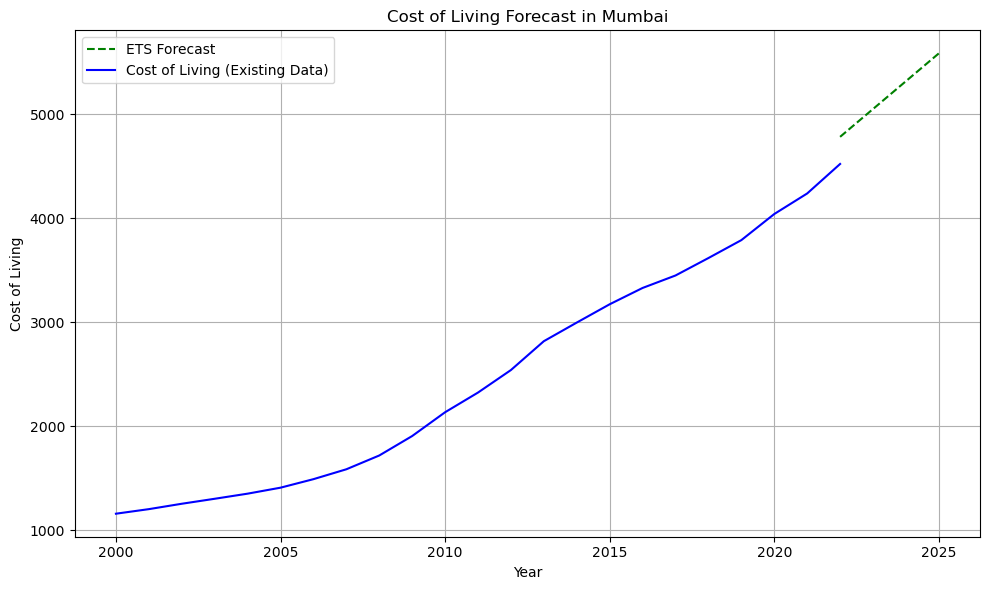

The predicted cost of living in Mumbai for the year 2025 is: 5584.90


In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Function to predict cost for a given city and year using ETS
def predict_cost_of_living_ets(city_data, city_name, prediction_year):
    model = ExponentialSmoothing(city_data[::-1], trend='add')
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=prediction_year - 2022 + 1)  # Adjusted steps calculation
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(2022, prediction_year + 1), forecast, color='green', linestyle='--', label='ETS Forecast')  # Adjusted the range for forecast
    
    plt.plot(range(2000, 2000 + len(city_data)), city_data[::-1], label='Cost of Living (Existing Data)', color='blue')

    plt.title(f'Cost of Living Forecast in {city_name}')
    plt.xlabel('Year')
    plt.ylabel('Cost of Living')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return forecast[-1]


# Example usage
#city_name = 'Mumbai'  # Assuming you have defined city_name
city_data = merged_df_7.loc[merged_df_7['city'] == city_name, '2022':'2000'].values.flatten()
#prediction_year = 2030  # Replace with the year you want to predict
predicted_cost_ets = predict_cost_of_living_ets(city_data, city_name, prediction_year)
print(f"The predicted cost of living in {city_name} for the year {prediction_year} is: {predicted_cost_ets:.2f}")


## USING LSTM TO PLOT AND PREDICT THE COST OF LIVING(OUR OUTPUT) AND DISPLAYING IT

1/1 [==============================] - 1s 715ms/step


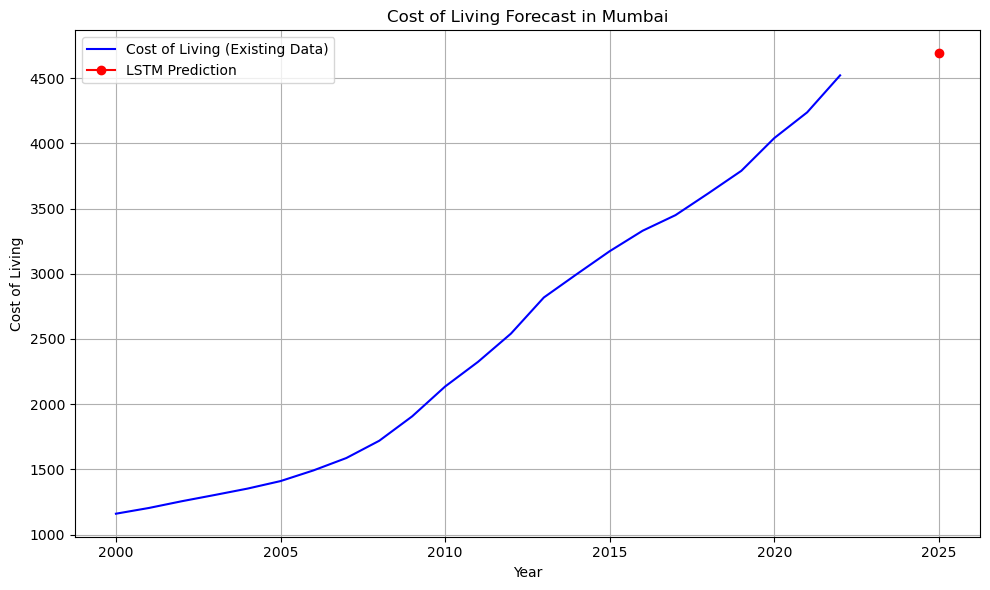

The predicted cost of living in Mumbai for the year 2025 is: 4690.51


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to create LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Function to predict cost for a given city and year using LSTM
def predict_cost_of_living_lstm(city_data, city_name, prediction_year):
    # Scale the data
    scaler = MinMaxScaler()
    city_data_scaled = scaler.fit_transform(city_data.reshape(-1, 1))

    # Reverse the order of data for prediction
    city_data_scaled_reversed = city_data_scaled[::-1]

    # Prepare the data for LSTM
    X = []
    y = []
    for i in range(len(city_data_scaled_reversed) - 1):
        X.append(city_data_scaled_reversed[i])
        y.append(city_data_scaled_reversed[i + 1])

    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], 1, 1))  # Reshape for LSTM input

    # Create and fit the LSTM model
    model = create_lstm_model()
    model.fit(X, y, epochs=100, batch_size=1, verbose=0)

    # Predict for the given year
    last_data_point = city_data_scaled_reversed[-1].reshape(1, 1, 1)
    prediction = model.predict(last_data_point)
    prediction = scaler.inverse_transform(prediction)[0][0]

    # Plotting the predictions
    plt.figure(figsize=(10, 6))
    plt.plot(range(2000, 2023), city_data[::-1], label='Cost of Living (Existing Data)', color='blue')  # Reverse order for plotting
    plt.plot(prediction_year, prediction, marker='o', color='red', label='LSTM Prediction')
    plt.title(f'Cost of Living Forecast in {city_name}')
    plt.xlabel('Year')
    plt.ylabel('Cost of Living')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Return the predicted cost for the specified year
    return prediction

# Example usage
# city_name = 'Mumbai'
city_data = merged_df_7.loc[merged_df_7['city'] == city_name, '2022':'2000'].values.flatten()
#prediction_year = 2030  # Replace with the year you want to predict
predicted_cost_lstm = predict_cost_of_living_lstm(city_data, city_name, prediction_year)
print(f"The predicted cost of living in {city_name} for the year {prediction_year} is: {predicted_cost_lstm:.2f}")


## USING SARIMA FUNCTION TO PLOT AND PREDICT THE COST OF LIVING(OUR OUTPUT) AND DISPLAYING IT

/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.
/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.14529D+00    |proj g|=  3.05302D-01

At iterate    5    f=  4.04639D+00    |proj g|=  7.34171D-03

At iterate   10    f=  4.03737D+00    |proj g|=  7.32666D-03

At iterate   15    f=  3.94211D+00    |proj g|=  3.00694D-02

At iterate   20    f=  3.93861D+00    |proj g|=  8.09521D-05

At iterate   25    f=  3.93860D+00    |proj g|=  9.76573D-04

At iterate   30    f=  3.93848D+00    |proj g|=  2.78672D-03

At iterate   35    f=  3.93844D+00    |proj g|=  3.51938D-03

At iterate   40    f=  3.93833D+00    |proj g|=  8.39305D-04

At iterate   45    f=  3.93831D+00    |proj g|=  4.27708D-04

At iterate   50    f=  3.93829D+00    |proj g|=  4.98056D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

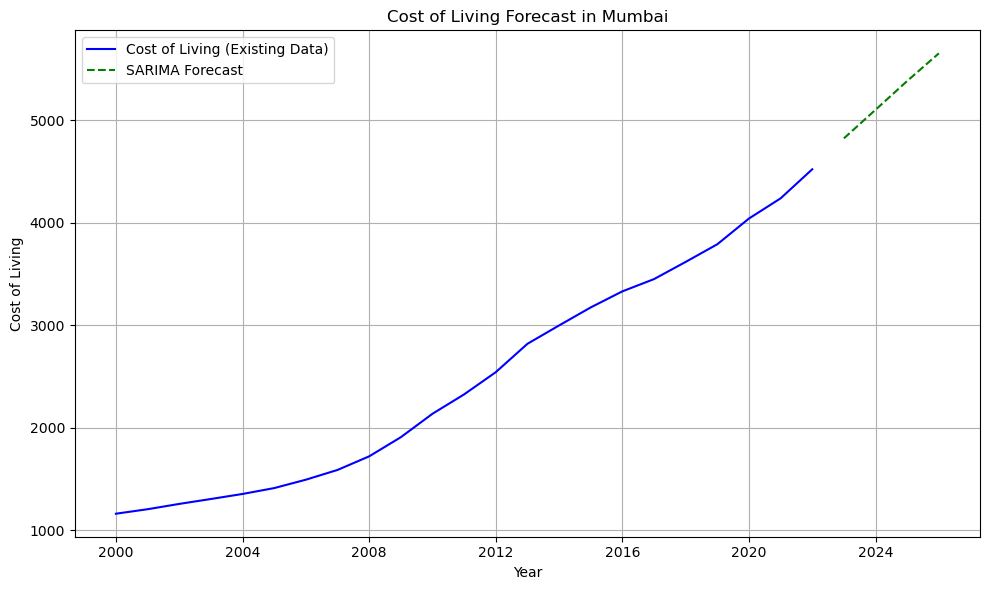

The predicted cost of living in Mumbai for the year 2025 is: 5653.07


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to predict cost for a given city and year using SARIMA
def predict_cost_of_living_sarima(city_data, city_name, prediction_year):
    # Create a range of years as index
    years_index = pd.date_range(start="1999", periods=len(city_data), freq='Y')

    # Convert city_data to a pandas Series with years as index
    city_data_series = pd.Series(city_data[::-1], index=years_index)

    # Fit SARIMA model
    model = SARIMAX(city_data_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))  # Example order, you may need to tune this
    model_fit = model.fit()

    # Forecast future values
    forecast = model_fit.forecast(steps=prediction_year - city_data_series.index[-1].year)

    # Plotting the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(city_data_series.index, city_data_series, label='Cost of Living (Existing Data)', color='blue')
    plt.plot(forecast.index, forecast, color='green', linestyle='--', label='SARIMA Forecast')

    plt.title(f'Cost of Living Forecast in {city_name}')
    plt.xlabel('Year')
    plt.ylabel('Cost of Living')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Return the forecasted cost for the specified year
    return forecast[-1]

# Example usage
#city_name = 'Mumbai'
city_data = merged_df_7.loc[merged_df_7['city'] == city_name, '2022':'2000'].values.flatten()
#prediction_year = 2022  # Replace with the year you want to predict
predicted_cost_sarima = predict_cost_of_living_sarima(city_data, city_name, prediction_year)
print(f"The predicted cost of living in {city_name} for the year {prediction_year} is: {predicted_cost_sarima:.2f}")


## USING ARIMA FUNCTION TO PLOT AND PREDICT THE COST OF LIVING(OUR OUTPUT) AND DISPLAYING IT

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Function to predict cost for a given city and year using ARIMA
def predict_cost_of_living_arima(city_data, city_name, prediction_year):
    # Create a range of years as index
    years_index = pd.date_range(start="1999", periods=len(city_data), freq='Y')

    # Convert city_data to a pandas Series with years as index
    city_data_series = pd.Series(city_data[::-1], index=years_index)

    # Fit ARIMA model
    model = ARIMA(city_data_series, order=(2,1,2))  # Example order, you may need to tune this
    model_fit = model.fit()

    # Forecast future values
    forecast = model_fit.forecast(steps=prediction_year - city_data_series.index[-1].year)

    # Plotting the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(city_data_series.index, city_data_series, label='Cost of Living (Existing Data)', color='blue')
    plt.plot(forecast.index, forecast, color='green', linestyle='--', label='ARIMA Forecast')

    plt.title(f'Cost of Living Forecast in {city_name}')
    plt.xlabel('Year')
    plt.ylabel('Cost of Living')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Return the forecasted cost for the specified year
    return forecast[-1]

# Example usage
#city_name = 'Mumbai'
city_data = merged_df_7.loc[merged_df_7['city'] == city_name, '2022':'2000'].values.flatten()
#prediction_year = 2022  # Replace with the year you want to predict
predicted_cost_arima = predict_cost_of_living_arima(city_data, city_name, prediction_year)
print(f"The predicted cost of living in {city_name} for the year {prediction_year} is: {predicted_cost_arima:.2f}")


## USING POLYNOMIAL REGRESSION FUNCTION TO PLOT AND PREDICT THE COST OF LIVING(OUR OUTPUT) AND DISPLAYING IT

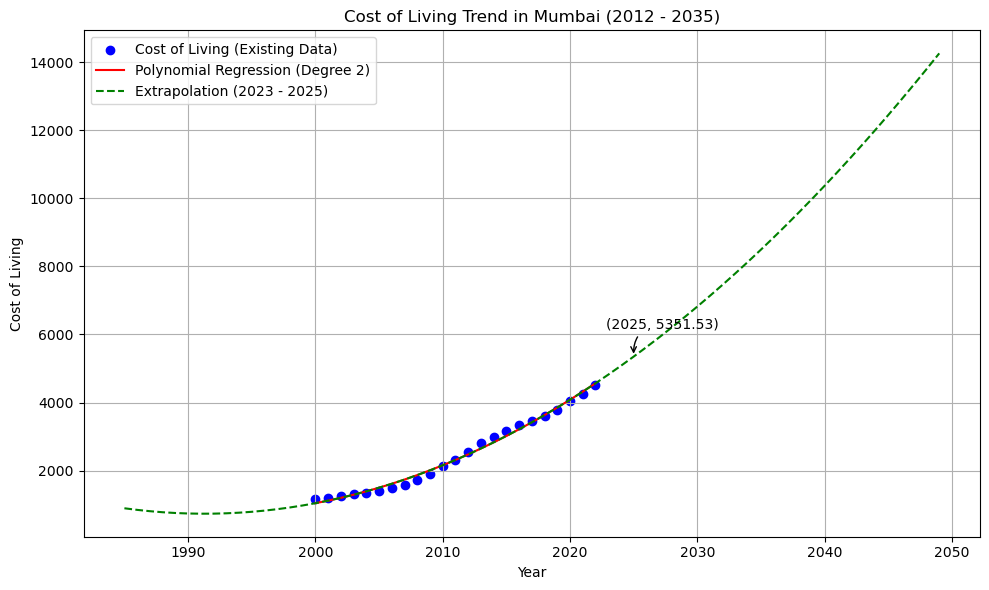

The slope at 2025 for Mumbai is: 273.63
The predicted cost of living range in Mumbai for the year 2025 is: 5083.95 to 5619.11$


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Function to predict cost for a given city and year
def predict_cost_of_living(years, city_data, city_name, prediction_year):
    coefficients = np.polyfit(years, city_data, 2)
    poly_function = np.poly1d(coefficients)

    # Plotting the polynomial curve
    plt.figure(figsize=(10, 6))
    plt.scatter(years, city_data, label='Cost of Living (Existing Data)', color='blue')
    plt.plot(years, poly_function(years), color='red', label='Polynomial Regression (Degree 2)')

    # Extending the curve to predict values for future years
    future_years = np.arange(1985, 2050)
    predicted_values = poly_function(future_years)
    plt.plot(future_years, predicted_values, color='green', linestyle='--', label=f'Extrapolation ({max(years) + 1} - {prediction_year})')

    plt.title(f'Cost of Living Trend in {city_name} (2012 - {prediction_year + 10})')
    plt.xlabel('Year')
    plt.ylabel('Cost of Living')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Annotation for a specific year
    x_annotation = prediction_year
    y_annotation = poly_function(x_annotation)
    plt.annotate(f'({x_annotation}, {y_annotation:.2f})', (x_annotation, y_annotation),
                 xytext=(-20, 20), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

    plt.show()

    # Calculate the derivative of the polynomial function
    derivative_function = np.polyder(poly_function)

    # Calculate the slope (derivative) at the given prediction year
    slope_at_prediction_year = derivative_function(prediction_year)
    print(f"The slope at {prediction_year} for {city_name} is: {slope_at_prediction_year:.2f}")

    # Return the predicted cost for the specified year
    return poly_function(prediction_year)

# # Sample data (Replace with actual data)
# years = list(range(2010, 2000, -1)) # Replace with actual years data
# city_data = merged_df_7.loc[merged_df_7['city'] == city_name, '2010':'2000'].values.flatten() # Replace with actual cost data
# #city_name = 'Mumbai'

# # Example usage
# #prediction_year = 2034  # Replace with the year you want to predict
# predicted_cost = predict_cost_of_living(years, city_data, city_name, prediction_year)
# print(f"The predicted cost of living in {city_name} for the year {prediction_year} is: {predicted_cost:.2f}")

#city_name = 'Mumbai'
#years = np.array([2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000])  # Ensure this array has the correct length
years = list(range(2022, 1999, -1))
city_data = merged_df_7.loc[merged_df_7['city'] == city_name, '2022':'2000'].values.flatten()
#prediction_year = 2030  # Replace with the year you want to predict
predicted_cost = predict_cost_of_living(years, city_data, city_name, prediction_year)
lower_bound = predicted_cost - 0.05 * predicted_cost
upper_bound = predicted_cost + 0.05 * predicted_cost
#print(f"The predicted cost of living range in {city_name} for the year {prediction_year} is: {predicted_cost:.2f}")
print(f"The predicted cost of living range in {city_name} for the year {prediction_year} is: {lower_bound:.2f} to {upper_bound:.2f}$")


In [ ]:
# Ensemble the predictions using simple averaging
def ensemble_predictions(predictions):
    # Compute the average prediction
    ensemble_prediction = np.mean(predictions, axis=0)
    return ensemble_prediction

# Example usage
#city_name = 'Mumbai'
city_data = merged_df_7.loc[merged_df_7['city'] == city_name, '2022':'2000'].values.flatten()
#prediction_year = 2030

# Get predictions from each model
predicted_cost_ets = predict_cost_of_living_ets(city_data, city_name, prediction_year)
predicted_cost_lstm = predict_cost_of_living_lstm(city_data, city_name, prediction_year)
predicted_cost_sarima = predict_cost_of_living_sarima(city_data, city_name, prediction_year)
predicted_cost_arima = predict_cost_of_living_arima(city_data, city_name, prediction_year)
predicted_cost_poly = predict_cost_of_living(years, city_data, city_name, prediction_year)

# Ensemble predictions
predictions = np.array([predicted_cost_ets, predicted_cost_lstm, predicted_cost_sarima, predicted_cost_arima, predicted_cost_poly])
#predictions = np.array([predicted_cost_arima, predicted_cost_ets, predicted_cost_lstm, predicted_cost_sarima])
#predictions = np.array([predicted_cost_ets, predicted_cost_arima, predicted_cost_sarima])
#predictions = np.array([predicted_cost_poly, predicted_cost_arima])

ensemble_prediction = ensemble_predictions(predictions)

print(f"The ensemble predicted cost of living in {city_name} for the year {prediction_year} is: {ensemble_prediction:.2f}")


In [ ]:
import os
current_directory = os.getcwd()

In [ ]:
current_directory

In [ ]:
file_name = 'dataset_india1.xlsx'
file_path = os.path.join(current_directory, file_name)

In [ ]:
pip install openpyxl

In [ ]:
df_try1.to_excel(file_path, index=False, engine='openpyxl')

In [ ]:
#df_try1.to_excel(file_path)